# Exploratory Data Analysis (EDA) 

- FORBES 'Global 2000'  año 2022
- FORBES 'Billonarios'  año 2022

 1. Forbes Global 2000 clasifica a las empresas más grandes del mundo utilizando cuatro métricas: ventas, ganancias, activos y valor de mercado.
 Utilizan los datos financieros de los últimos 12 meses disponibles al 22 de abril de 2022 para calcular las métricas utilizadas para su clasificación.

2. Forbes elabora una listado de multimillonarios anualmente, utilizando los precios de sus acciones y los tipos de cambio del 11 de marzo de 2022 para calcular el patrimonio neto.

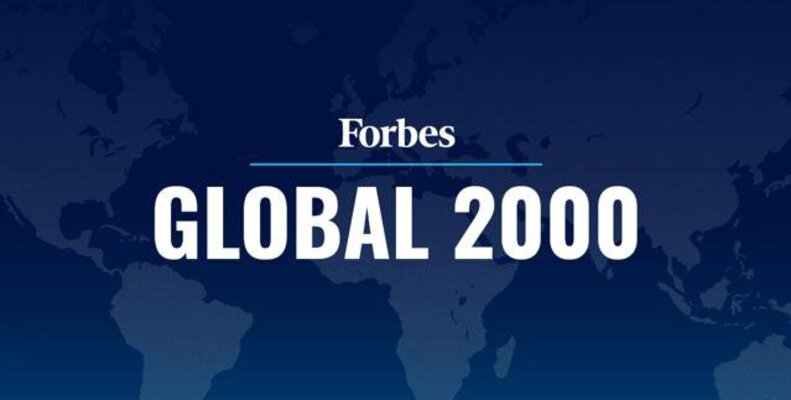

In [274]:
Image(filename='dataset-cover.jpg' , width=1000) 

info : https://forbes.es/listas/160753/forbes-global-2000

1. RECOPILACIÓN Y CARGA DE DATOS

In [1]:
# Importamos las librerías necesarias:

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Librerías para gráficos:

import plotly_express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)


# Para añadir imagen:

from IPython.display import Image
import matplotlib.image as mpimg # para añadir imagen al gráfico

In [2]:
# Leemos csv y los convertimos en dataframe:

df_2000=pd.read_csv(r"C:\VSCode\samplerepo\Proyecto Final\forbes global 2022(2000 companies).csv")
df_bill=pd.read_csv(r"C:\VSCode\samplerepo\Proyecto Final\2022_forbes_billionaires.csv")

2. CONTENIDO DE LOS DATOS

In [6]:
df_2000.shape

(2000, 7)

In [7]:
df_bill.shape

(2600, 8)

In [8]:
df_2000

rank                                      global company        country  \
0         1                                 Berkshire Hathaway  United States   
1         2                                               ICBC          China   
2         3           Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia   
3         4                                     JPMorgan Chase  United States   
4         5                            China Construction Bank          China   
...     ...                                                ...            ...   
1995   1995  Shenzhen Feima International Supply Chain Co.,...          China   
1996   1997                                               NMDC          India   
1997   1997                         Sichuan Changhong Electric          China   
1998   1999                              Credit Bank of Moscow         Russia   
1999   1999                                 Satellite Chemical          China   

         sales     profit        assets market value  
0     $276.09 B    $89.8 B    $958.78 B    $741.48 B  
1     $208.13 B   $54.03 B  $5,518.51 B    $214.43 B  
2     $400.38 B  $105.36 B    $576.04 B  $2,292.08 B  
3     $124.54 B   $42.12 B  $3,954.69 B    $374.45 B  
4     $202.07 B   $46.89 B  $4,746.95 B    $181.32 B  
...         ...        ...          ...          ...  
1995      $37 M    $1.41 B       $166 M      $1.14 B  
1996    $3.52 B    $1.41 B      $5.71 B       $6.4 B  
1997   $15.72 B    $53.1 M     $12.11 B      $1.96 B  
1998    $2.53 B   $370.1 M     $45.15 B      $2.06 B  
1999    $4.41 B   $931.3 M      $7.64 B      $9.52 B  

[2000 rows x 7 columns]

In [9]:
df_bill

Unnamed: 0  rank                       name networth  age  \
0              0     1                 Elon Musk    $219 B   50   
1              1     2                Jeff Bezos    $171 B   58   
2              2     3  Bernard Arnault & family    $158 B   73   
3              3     4                Bill Gates    $129 B   66   
4              4     5            Warren Buffett    $118 B   91   
...          ...   ...                        ...      ...  ...   
2595        2595  2578    Jorge Gallardo Ballart      $1 B   80   
2596        2596  2578              Nari Genomal      $1 B   82   
2597        2597  2578            Ramesh Genomal      $1 B   71   
2598        2598  2578            Sunder Genomal      $1 B   68   
2599        2599  2578     Horst-Otto Gerberding      $1 B   69   

            country                  source                industry  
0     United States           Tesla, SpaceX             Automotive   
1     United States                  Amazon             Technology   
2            France                    LVMH       Fashion & Retail   
3     United States               Microsoft             Technology   
4     United States      Berkshire Hathaway  Finance & Investments   
...             ...                     ...                     ...  
2595          Spain         pharmaceuticals             Healthcare   
2596    Philippines                 apparel       Fashion & Retail   
2597    Philippines                 apparel       Fashion & Retail   
2598    Philippines                garments       Fashion & Retail   
2599        Germany  flavors and fragrances        Food & Beverage   

[2600 rows x 8 columns]

In [10]:
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rank            2000 non-null   int64 
 1   global company  2000 non-null   object
 2   country         2000 non-null   object
 3   sales           2000 non-null   object
 4   profit          2000 non-null   object
 5   assets          2000 non-null   object
 6   market value    2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [11]:
df_bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [12]:
df_2000.columns.tolist() # comprobamos que tenemos espacios en los nombres de las columnas 'rank' , 'sales', y 'profit'

['rank ',
 'global company',
 'country',
 'sales ',
 'profit ',
 'assets',
 'market value']

In [13]:
df_bill.columns.tolist()

['Unnamed: 0',
 'rank',
 'name',
 'networth',
 'age',
 'country',
 'source',
 'industry']

 OVERVIEW : visión general de nuestros datos

In [57]:
import pandas_profiling  
from pandas_profiling.utils.cache import cache_file # para tener un overview de nuestros datos

In [58]:
report = df_2000.profile_report() # filtramos el report del df
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
report.to_file(output_file="Forbes_global2000_eda.html") # salvamos el archivo a formato html , para poderlo visualizar desde cualquier ubicación.

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
report = df_bill.profile_report() # filtramos el report del df
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
report.to_file(output_file="Forbes_billionaries_eda.html") # salvamos el archivo

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

2. DATA PREPROCESSING (PREPROCESAMIENTO DE DATOS)

2.1 LIMPIEZA DE DATOS 

In [14]:
df_2000.isnull().sum() # comprobamos que no tenemos valores nulos en df_2000

rank              0
global company    0
country           0
sales             0
profit            0
assets            0
market value      0
dtype: int64

In [15]:
df_bill.isnull().sum() # comprobamos que no tenemos valores nulos en df_bill

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64

In [3]:
df_bill = df_bill.drop(columns=['Unnamed: 0']) # eliminamos la columna 'Unnamed: 0'
df_bill

rank                       name networth  age        country  \
0        1                 Elon Musk    $219 B   50  United States   
1        2                Jeff Bezos    $171 B   58  United States   
2        3  Bernard Arnault & family    $158 B   73         France   
3        4                Bill Gates    $129 B   66  United States   
4        5            Warren Buffett    $118 B   91  United States   
...    ...                        ...      ...  ...            ...   
2595  2578    Jorge Gallardo Ballart      $1 B   80          Spain   
2596  2578              Nari Genomal      $1 B   82    Philippines   
2597  2578            Ramesh Genomal      $1 B   71    Philippines   
2598  2578            Sunder Genomal      $1 B   68    Philippines   
2599  2578     Horst-Otto Gerberding      $1 B   69        Germany   

                      source                industry  
0              Tesla, SpaceX             Automotive   
1                     Amazon             Technology   
2                       LVMH       Fashion & Retail   
3                  Microsoft             Technology   
4         Berkshire Hathaway  Finance & Investments   
...                      ...                     ...  
2595         pharmaceuticals             Healthcare   
2596                 apparel       Fashion & Retail   
2597                 apparel       Fashion & Retail   
2598                garments       Fashion & Retail   
2599  flavors and fragrances        Food & Beverage   

[2600 rows x 7 columns]

2.2 MANIPULACIÓN DE DATOS 

In [4]:
df_2000 = df_2000.set_index("rank ") # creamos un nuevo índice con la columna 'rank' en df_2000
df_2000.head()

global company        country     sales   \
rank                                                                        
1                            Berkshire Hathaway  United States  $276.09 B   
2                                          ICBC          China  $208.13 B   
3      Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia  $400.38 B   
4                                JPMorgan Chase  United States  $124.54 B   
5                       China Construction Bank          China  $202.07 B   

         profit        assets market value  
rank                                        
1        $89.8 B    $958.78 B    $741.48 B  
2       $54.03 B  $5,518.51 B    $214.43 B  
3      $105.36 B    $576.04 B  $2,292.08 B  
4       $42.12 B  $3,954.69 B    $374.45 B  
5       $46.89 B  $4,746.95 B    $181.32 B

In [5]:
df_bill = df_bill.set_index("rank") # creamos un nuevo índice con la columna 'rank' en df_bill
df_bill.head()

name networth  age        country  \
rank                                                           
1                    Elon Musk    $219 B   50  United States   
2                   Jeff Bezos    $171 B   58  United States   
3     Bernard Arnault & family    $158 B   73         France   
4                   Bill Gates    $129 B   66  United States   
5               Warren Buffett    $118 B   91  United States   

                  source                industry  
rank                                              
1          Tesla, SpaceX             Automotive   
2                 Amazon             Technology   
3                   LVMH       Fashion & Retail   
4              Microsoft             Technology   
5     Berkshire Hathaway  Finance & Investments

In [19]:
df_2000.shape # comprobamos mismo número de columnas en ambos datasets

(2000, 6)

In [20]:
df_bill.shape

(2600, 6)

- Transformación data df_2000 : 

In [6]:
# Tomamos las columnas 'sales' y 'profit' eliminando el espacio en el nombre de la columna para poder referenciarlas

df_2000.columns=df_2000.columns.str.replace('sales ', 'sales')
df_2000.columns=df_2000.columns.str.replace('profit ', 'profit')

Tenemos valores en billones y millones , por lo que unificamos las unidades: 

In [7]:
df_2000.dtypes # comprobamos el tipo de datos que tenemos

global company    object
country           object
sales             object
profit            object
assets            object
market value      object
dtype: object

In [8]:
def convert(x): # función que transforme nuestros datos a numéricos y unifique las unidades a billones, además elimine '$ ' y ','
    x=x.replace('$','')
    x=x.replace(',','')
    if 'M' in x :
         x=x.replace('M','')
         x=pd.to_numeric(x)
         x=x/1000
    else:
        x=x.replace('B','')
        x=pd.to_numeric(x)
        
    return x

In [9]:
df_2000["sales"]=df_2000["sales"].apply(convert) # aplicamos la función a cada columna

In [10]:
df_2000["profit"]=df_2000["profit"].apply(convert)

In [11]:
df_2000["assets"]=df_2000["assets"].apply(convert)

In [12]:
df_2000["market value"]=df_2000["market value"].apply(convert)

In [13]:
df_2000.head() # comprobamos los valores y que todos ellos sean billones

global company        country   sales  \
rank                                                                     
1                            Berkshire Hathaway  United States  276.09   
2                                          ICBC          China  208.13   
3      Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia  400.38   
4                                JPMorgan Chase  United States  124.54   
5                       China Construction Bank          China  202.07   

       profit   assets  market value  
rank                                  
1       89.80   958.78        741.48  
2       54.03  5518.51        214.43  
3      105.36   576.04       2292.08  
4       42.12  3954.69        374.45  
5       46.89  4746.95        181.32

In [14]:
df_2000.tail()

global company country   sales  \
rank                                                                       
1995   Shenzhen Feima International Supply Chain Co.,...   China   0.037   
1997                                                NMDC   India   3.520   
1997                          Sichuan Changhong Electric   China  15.720   
1999                               Credit Bank of Moscow  Russia   2.530   
1999                                  Satellite Chemical   China   4.410   

       profit  assets  market value  
rank                                 
1995   1.4100   0.166          1.14  
1997   1.4100   5.710          6.40  
1997   0.0531  12.110          1.96  
1999   0.3701  45.150          2.06  
1999   0.9313   7.640          9.52

In [30]:
df_2000.dtypes # comprobamos la transformación del tipo de dato

global company     object
country            object
sales             float64
profit            float64
assets            float64
market value      float64
dtype: object

In [31]:
df_2000.describe() 

sales       profit       assets  market value
count  2000.000000  2000.000000  2000.000000   2000.000000
mean     23.876035     2.502107   116.848065     38.242607
std      40.943902     6.159209   363.706259    117.206796
min       0.000000   -12.050000     0.166000      0.144000
25%       5.607500     0.590000    14.787500      7.325000
50%      12.170000     1.055000    31.920000     16.625000
75%      23.725000     2.270000    77.447500     34.710000
max     572.750000   105.360000  5518.510000   2640.320000

Transformación data df_bill :

In [15]:
df_bill['networth'] = df_bill['networth'].str.replace('$','').str.replace('B','') # eliminamos símbolo $ y B (billones) en df_bill

In [16]:
df_bill.head() # comprobamos nuestros valores

name networth  age        country  \
rank                                                           
1                    Elon Musk      219    50  United States   
2                   Jeff Bezos      171    58  United States   
3     Bernard Arnault & family      158    73         France   
4                   Bill Gates      129    66  United States   
5               Warren Buffett      118    91  United States   

                  source                industry  
rank                                              
1          Tesla, SpaceX             Automotive   
2                 Amazon             Technology   
3                   LVMH       Fashion & Retail   
4              Microsoft             Technology   
5     Berkshire Hathaway  Finance & Investments

In [34]:
df_bill.dtypes # comprobamos tipo de dato del df de billonarios

name        object
networth    object
age          int64
country     object
source      object
industry    object
dtype: object

In [17]:
df_bill['networth'] = pd.to_numeric(df_bill['networth']) # transformamos a numérica la columna 'networth'

In [36]:
df_bill.dtypes # comprobamos el nuevo tipo de dato 

name         object
networth    float64
age           int64
country      object
source       object
industry     object
dtype: object

In [37]:
df_bill.describe()

networth          age
count  2600.000000  2600.000000
mean      4.860750    64.271923
std      10.659671    13.220607
min       1.000000    19.000000
25%       1.500000    55.000000
50%       2.400000    64.000000
75%       4.500000    74.000000
max     219.000000   100.000000

2.3. IDENTIFICACIÓN DE OUTLIERS Y VALORES ATÍPICOS

Lo veremos a través de un gráfico boxplot : nos ayudará a identificar patrones y tendencias que de otra manera pueden pasar desapercibidos. Además, nos pueden ayudar a encontrar valores atípicos que pueden estar influenciando nuestros resultados.

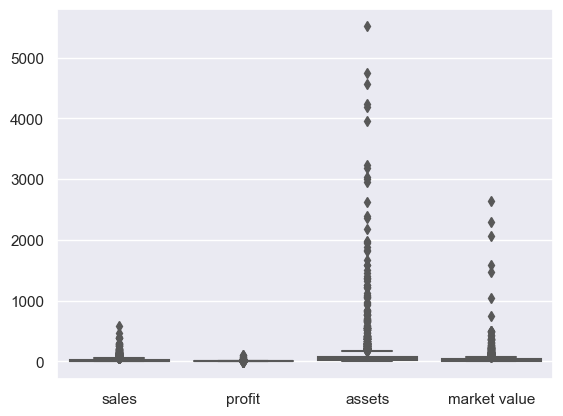

In [102]:
sns.boxplot(df_2000, color='m');

Podemos identificar valores atípicos: 

1. Valores atípicos bajos (negativos) en la variable 'profit' ganancias, que se alejan de la distribución normal de los datos y que representan pérdidas, por lo que ya sabemos que algunas de las empresas de este listado tienen pérdidas en beneficios.

2. Valores atípicos superiores , muy altos en 'assets': activos, con muchos valores que se alejan desmesuradamente de la media de los datos, ocurriendo lo mismo en 'market value' : valor de mercado, con algunas empresas con estos valores muy por encima de la media.
*Estos valores son más altos que los valores de la mayoría de la muestra y son un indicador de que hay una mayor variación en los datos y no se consideran como parte de la distribución normal de los datos.

In [103]:
df_2000[df_2000['profit'] < 0] # comprobamos que tenemos muchas empresas con valores negativos en beneficio, es decir, pérdidas.

global company         country   sales  profit  assets  \
rank                                                                       
429                       Boeing   United States   62.29 -4.2000  138.55   
467                       JD.com           China  147.63 -0.5604   77.90   
479                     Vodafone  United Kingdom   53.63 -0.2910  178.59   
540                   Prudential  United Kingdom   26.52 -1.9800  189.35   
598          Credit Suisse Group     Switzerland   30.07 -1.8000  829.54   
...                          ...             ...     ...     ...     ...   
1944     Hainan Airlines Holding           China    5.63 -7.9600   33.03   
1966   Zall Smart Commerce Group           China   16.21 -0.1792    9.30   
1984              Unity Software   United States    1.11 -0.5326    4.84   
1985                     Li Auto           China    4.20 -0.0489    9.70   
1986                      Twilio   United States    2.84 -0.9499   13.00   

       market value  
rank                 
429         104.450  
467          68.560  
479          46.360  
540          36.700  
598          18.680  
...             ...  
1944          8.760  
1966          0.698  
1984         22.410  
1985         22.390  
1986         22.290  

[122 rows x 6 columns]

Examinamos la variable numérica 'networth' : valor neto , del dataset de billonarios:

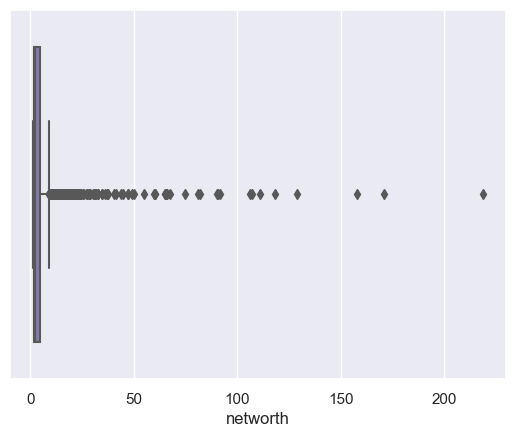

In [104]:
sns.boxplot(df_bill, x='networth', color='m'); 

Podemos observar como tenemos datos atípicos superiores , al ser valores muy altos, no siguiendo una distribución normal en los datos, el patrimonio neto de algunos billonarios supera excesivamente a la media de ellos.
Estos valores son más altos que los valores de la mayoría de la muestra y son un indicador de que hay una mayor variación en los datos de lo que se esperaría. 

2.4. DISTRIBUCIÓN DE LOS DATOS 

- Vamos a verlo a través de un gráfico displot : nos servirá para explorar la distribución de los datos de ambos datasets , con las variables numéricas . Esto nos ayudará a identificar patrones y tendencias.

Veremos la cantidad de veces que se repite un valor en las variables 'sales', 'profit', 'assets' y 'market value'  en df_2000, y en 'networth' en df_bill. Esto nos permitirá ver si hay valores que se repiten con frecuencia o si hay algunos valores que son extremadamente infrecuentes.

In [105]:
import warnings
warnings.filterwarnings("ignore")

Exploramos los datos en la variable 'ventas' :

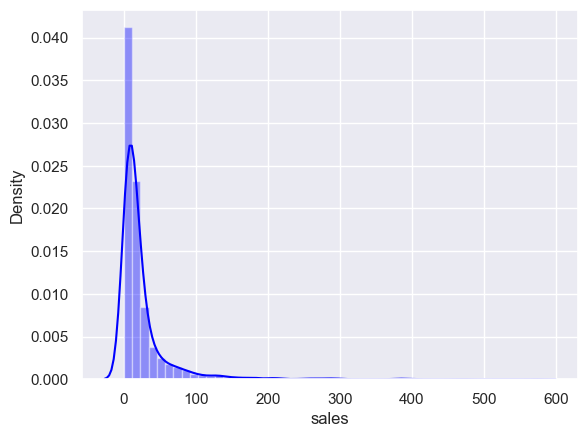

In [106]:
sns.distplot(df_2000['sales'], color='blue'); 

Podemos observar como hay una distribución normal en la mayoría de los datos , con algunos valores en ventas muy por encima del resto de empresas.

Exploramos la variable 'beneficio' :

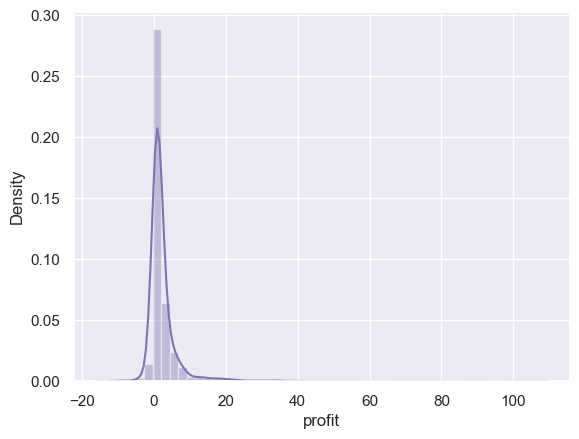

In [108]:
sns.distplot(df_2000['profit'], color='m'); 

Aquí es donde podemos ver datos más distanciados, ya que como examinamos antes, hay 122 empresas con pérdidas en este caso y con ganancias muy dispares.

Examinamos ahora la variable 'activos' :

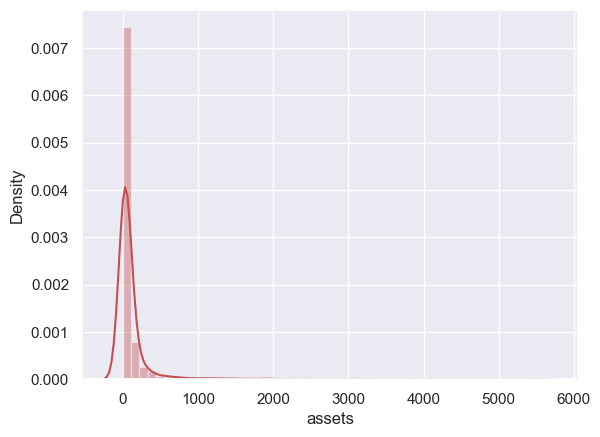

In [109]:
sns.distplot(df_2000['assets'], color='r'); 

Como ocurrió con 'sales' podemos ver una distribución normal de estos datos.

Exploramos ahora la variable 'valor de mercado' : 

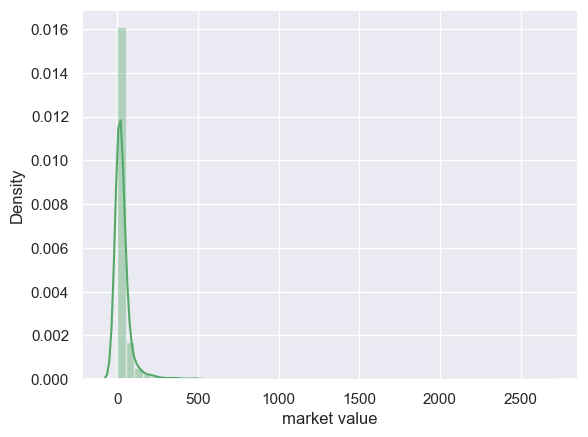

In [110]:
sns.distplot(df_2000['market value'], color='g'); 

Comprobamos también una distribución normal de los datos.

Exploramos ahora la variable 'valor neto ' en el df de billonarios:

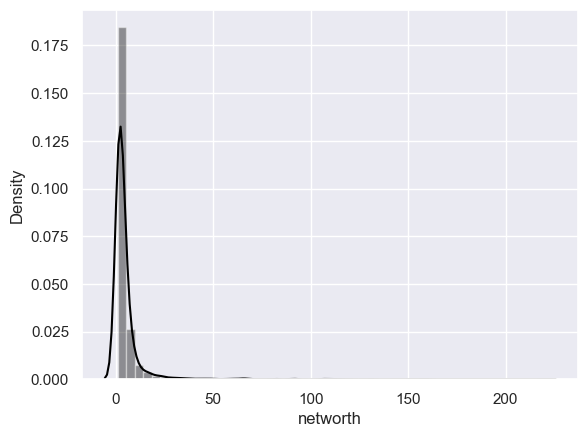

In [111]:
sns.distplot(df_bill['networth'], color='black'); 

Podemos observar una distribución normal del conjunto de datos.

. Distribución general de los datos en df_2000

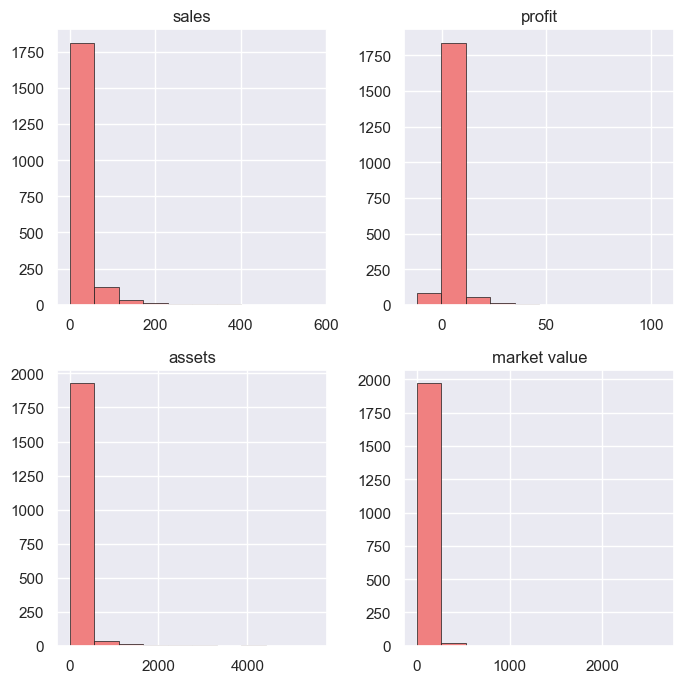

In [112]:
df_2000.hist(figsize=(7,7) , color='lightcoral', edgecolor='k' , linewidth= 0.5) 
plt.tight_layout()

2.5 RELACIÓN ENTRE VARIABLES 

- Usaremos un gráfico regplot:  sirve para visualizar la relación entre dos variables. Esto nos permitirá ver si existe una correlación entre las variables y si hay algún patrón o tendencia que se pueda ver claramente. También veremos una línea de regresión, lo que nos permitirá predecir los valores futuros para una variable usando los valores de la otra.

Vamos a investigar la variable valor de mercado 'market value' y como puede este crecer en un futuro.

-Analizamos la relación entre las ventas y el valor de mercado:

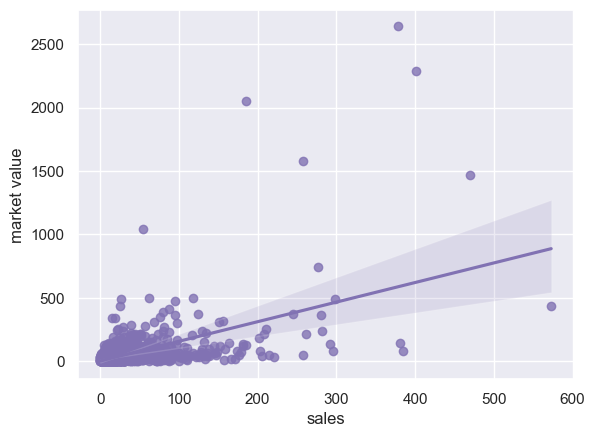

In [113]:
sns.regplot(x="sales", y="market value", data=df_2000, color="m"); 
# x=variable independiente(que estamos midiendo) y=variable dependiente( que estamos prediciendo)

Como podemos observar, hay una relación positiva entre las dos variables, a medida que aumentan las ventas aumenta el valor de mercado de las empresas.
La mayoría de las empresas distribuyen uniformamente sus ventas , con valores fuera de rango en agunas de ellas.

Analizamos la relación entre los activos y el valor de mercado:

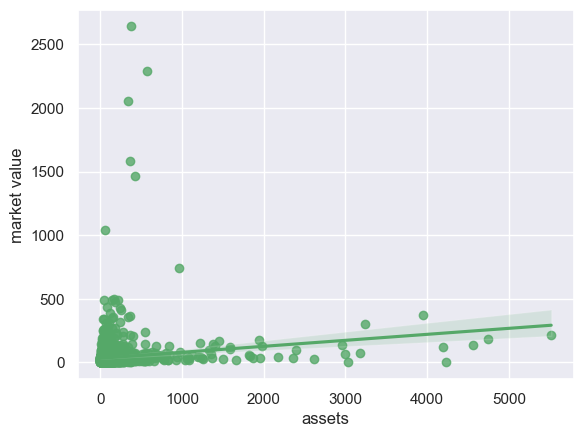

In [114]:
sns.regplot(x="assets", y="market value", data=df_2000, color='g');

Hay una tendencia positiva en los activos en relación con el valor de mercado, como indica la línea de regresión. La mayoría de las empresas tienen una distribución normal de los activos, con algunos valores atípicos de forma muy puntual.

La relación es más fuerte entre las ventas y el valor de mercado, que entre los activos y el valor de mercado, como lo indica la pendiente más pronunciada en la línea de regresión.

- Vamos a ver ahora como se relacionan las variables ventas, beneficios y activos con la variable 'valor de mercado' con un gráfico de dispersión pairplot:  podremos ver la correlación entre estas variables e identificar patrones en los datos.

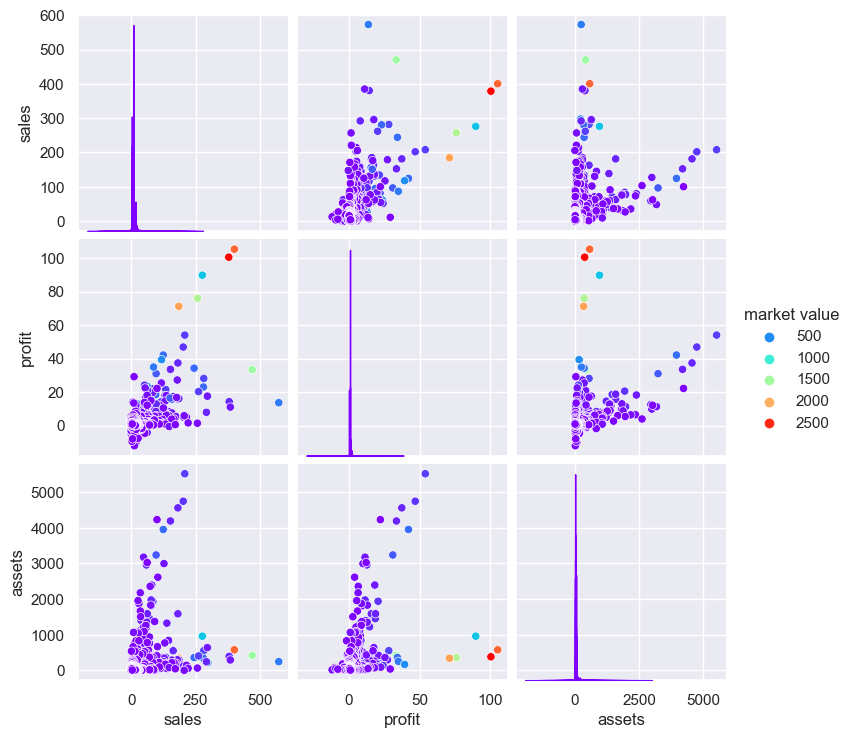

In [116]:
sns.pairplot(df_2000, hue='market value', palette='rainbow');

Podemos observar que todas estas variables tienen una alta relación con 'valor de mercado', tiene sentido pensar que a medida que aumentan las ventas, los activos y los beneficios lo hace también el valor de mercado de las empresas.

2.6 CORRELACIÓN

Realizamos ahora un gráfico 'mapa de calor' aplicando los métodos de correlación de Kendall y Spearman para medir las relaciones entre las variables y 'valor de mercado'. 

Una correlación positiva (1) significa que a medida que aumenta una variable, también aumenta la otra. Una correlación negativa (-1) significa que a medida que aumenta una variable, la otra disminuye.

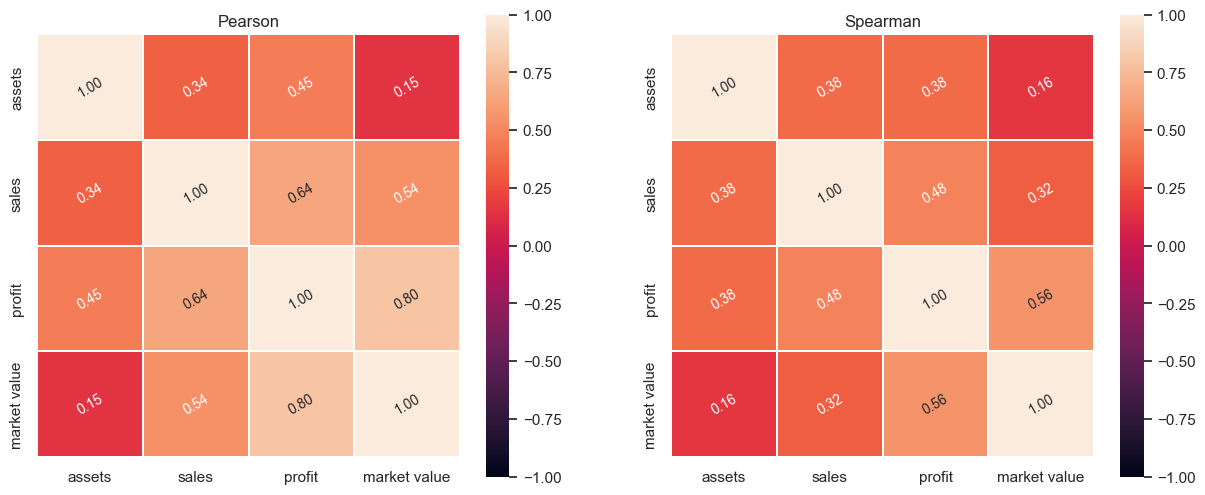

In [117]:
Pearson_matrix = df_2000.corr(method = 'pearson').sort_values(by = 'market value', axis = 0).sort_values(by = 'market value', axis = 1)
Spearman_matrix = df_2000.corr(method = 'spearman').sort_values(by = 'market value', axis = 0).sort_values(by = 'market value', axis = 1)

fig, ax =plt.subplots(1, 2, figsize=(15,6))
sns.heatmap(Pearson_matrix, annot=True, annot_kws={"size": 10, 'rotation': 30}, vmin=-1.0, vmax=1.0, center=0, square=True, cmap="rocket", linewidths=0.1, fmt='.2f', ax=ax[0])
sns.heatmap(Spearman_matrix, annot=True, annot_kws={"size": 10, 'rotation': 30}, vmin=-1.0, vmax=1.0, center=0, square=True, cmap="rocket", linewidths=0.1, fmt='.2f', ax=ax[1])
ax[0].set_title('Pearson')
ax[1].set_title('Spearman')
fig.show()

¿ Qué nos indica Pearson? 
Todas las variables están relacionadas de forma positiva.
Las variables 'profit' y 'market value' , están altamente correlacionadas de forma positiva (0.80) , cuando una aumenta lo hace también la otra: cuando aumentan las ventas aumenta también su valor de mercado y es donde se da el mayor grado de correlación; siendo donde menos (0.15) entre las variables 'assets' y 'market value'.

¿Qué nos indica Spearman? 
Todas las variables están relacionadas de forma positiva.
Vemos la correlación más alta y positiva entre las variables 'profit' y 'market value', es decir, a medida que aumentan los beneficios aumenta también el  valor de mercado de la empresa; mientras que la correlación con menor grado la vemos entre 'assets y 'market value'.

3. TEST DE NORMALIDAD

Vamos a comprobar si nuestros datos provienen de una distribución Gaussiana (Normal).

- Usaremos para ello el Test de Shapiro-Wilk:

¿Qué debemos asumir?
Que las observaciones de las muestras son "Independientes e Idénticamente Distribuidas" (idd)

¿Cuáles son nuestras hipótesis?
$H_{0}$: la muestra proviene de una distribución Gaussiana. 
$H_{1}$: la muestra NO proviene de una distribución Gaussiana. 

- df_2000: Tomaremos la variable nuevamente de 'valor de mercado' 

In [118]:
from scipy.stats import shapiro # importamos librería para usar este test

# Comprobamos la normalidad de la distribución a través de Shapiro
shapiro_test = shapiro(df_2000['market value'])

# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


Un p-valor de 0.0 significa que los datos no se ajustan a una distribución normal. Esto significa que los datos de la variable 'market value' no se distribuyen de forma simétrica alrededor de una media, por tanto la variable 'market value' no se puede usar para predecir los resultados de procesos aleatorios.

Mostramos los resultados de este test en un grafico QQ plot:

Para que la distribución fuera normal la línea azul debería estar sobre la roja, aquí no lo está, como vemos a continuación:

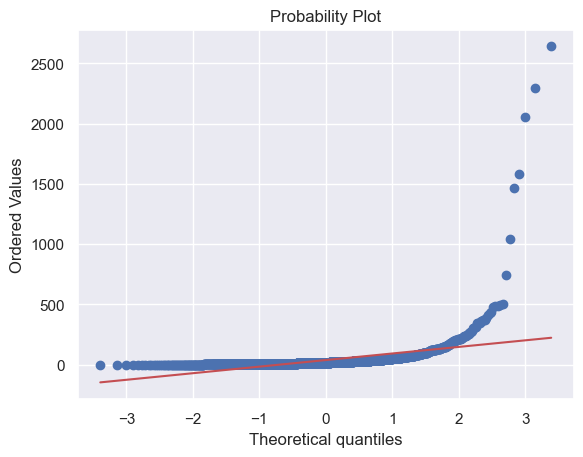

In [20]:
from scipy import stats
fig = plt.figure()
res = stats.probplot(df_2000['market value'], plot=plt) 
plt.show()

4. MODELO SUPERVISADO DE REGRESIÓN

Vamos a realizar una regresión múltiple con un modelo de regresión lineal : es un modelo que se utiliza para predecir una variable dependiente (y) a partir de una o más variables independientes (x). 

Primero vamos a definir las variables independientes (X) y dependientes (y). En este caso, vamos a estudiar las variables independientes  'profit' y 'sales' y la variable dependiente es 'market value', de esta forma prodremos predecir como crecerá el valor de mercado o no en relación con las ventas y los beneficios.

In [122]:
# librerías necesarias para el modelo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # modelo regresión lineal
from sklearn.metrics import mean_absolute_error,mean_squared_error # Evaluar el modelo con la métrica Mean Squared Error

In [123]:
# Dividimos el dataset en dos partes: entrenamiento y pruebas:

X = df_2000[['profit', 'sales']]
y = df_2000['market value']


# Dividimos los datos en entrenamiento y test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instaciamos el modelo
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_test)


# Calculamos el error cometido por las predicciones:

mse = mean_squared_error(y_test, y_pred) # error cuadrático medio
rmse = np.sqrt(mse) # calculamos la raíz cuadrada del error cuadrático medio (MSE)
mae = mean_absolute_error(y_test, y_pred)

# Muestra los errores
print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)


MSE:  1515.5407461731731
RMSE:  38.929946650017044
MAE:  22.384579110975796


MSE (Error Cuadrático Medio): Mide la diferencia entre los valores predichos y los valores reales. Es una medida de la precisión del modelo. Cuanto más bajo sea el MSE, mejor será el modelo.

RMSE (Raiz del Error Cuadrático Medio): Es una medida de la desviación promedio entre los valores predichos y los valores reales. Cuanto más bajo sea el RMSE, mejor será el modelo.

MAE (Error Absoluto Medio): Mide la diferencia promedio entre los valores predichos y los valores reales. Cuanto más bajo sea el MAE, mejor será el modelo.

De los resultados obtenidos, se puede concluir que el modelo de regresión lineal es bastante preciso, ya que los valores MSE, RMSE y MAE son relativamente bajos. Esto significa que el modelo es capaz de predecir los valores reales con una buena precisión.

Vamos a ver que nos indica otra métrica, 'R-squared' :

- Un valor de R-squared cercano a 1 nos indicará un ajuste fuerte y una relación positiva entre las variables independientes y la variable dependiente.
- Un valor de R-squared cercano a 0 indicará un ajuste débil y una relación débil o nula entre las variables independientes y la variable dependiente.

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score = model.score(X_test, y_test)
print("R-squared: ", score)

R-squared:  0.31247496458818813


R-squared:  0.31, nos indica que el modelo explica el 31 % de la variación en los datos. Esto sugiere que el modelo puede mejorar si se ajustan los parámetros, se agregan más características o se prueban otros modelos.

5. ANÁLISIS GLOBAL 2000

¿ Cuáles son las empresas más importantes del mundo? 

- Top 10 mejores empresas: 

In [135]:
df_2000.head(10)

global company        country   sales  \
rank                                                                     
1                            Berkshire Hathaway  United States  276.09   
2                                          ICBC          China  208.13   
3      Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia  400.38   
4                                JPMorgan Chase  United States  124.54   
5                       China Construction Bank          China  202.07   
6                                        Amazon  United States  469.82   
7                                         Apple  United States  378.70   
8                    Agricultural Bank of China          China  181.42   
9                               Bank of America  United States   96.83   
10                                 Toyota Motor          Japan  281.75   

       profit   assets  market value  
rank                                  
1       89.80   958.78        741.48  
2       54.03  5518.51        214.43  
3      105.36   576.04       2292.08  
4       42.12  3954.69        374.45  
5       46.89  4746.95        181.32  
6       33.36   420.55       1468.40  
7      100.56   381.19       2640.32  
8       37.38  4561.05        133.38  
9       31.00  3238.22        303.10  
10      28.15   552.46        237.73

- Top 10 empresas por ventas : 

In [125]:
top_10_sales = df_2000.nlargest(10, 'sales')

px.bar(top_10_sales, x='global company', y='sales', color='global company', title='Top 10 empresas por ventas')

- Top 10 empresas por beneficios :

In [126]:
top_10_profit = df_2000.nlargest(10, 'profit')

px.bar(top_10_profit, x='global company', y='profit', color='global company', title='Top 10 empresas por beneficios')

- Top 10 empresas por valor de mercado:

In [133]:
top_10_value = df_2000.nlargest(10, 'market value')

px.bar(top_10_value, x='global company', y='market value', color='global company', title='Top 10 empresas por valor de mercado')

Top 10 empresas por países : 

In [88]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_2000['country'][:10], y=df_2000['global company'][:10], text=df_2000['global company'][:10], textposition='auto', marker_color=['red', 'green', 'blue', 'orange', 'purple', 
                                                       'yellow', 'pink', 'brown', 'magenta', 'darkblue']))

fig.show()

¿ Qué países tienen mayor cantidad de empresas en este listado?

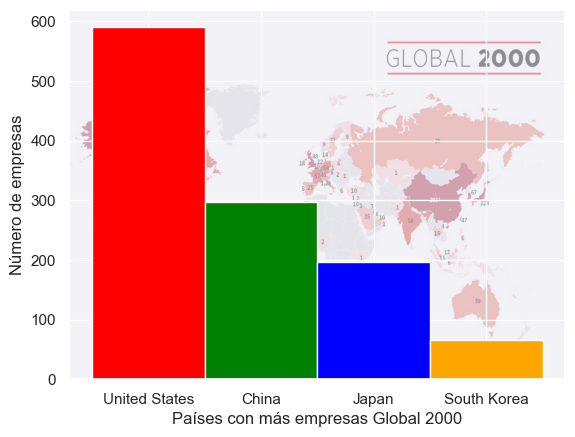

In [58]:
image = mpimg.imread('global_map.jpg')
fig, ax = plt.subplots()

data_grouped = df_2000.groupby('country').size()

# Seleccionar los 5 países con mayor aparición
top_5_2000 = data_grouped.sort_values(ascending=False).head(4)

plt.bar(top_5_2000.index, top_5_2000, color=['red', 'green', 'blue', 'orange', 'purple'],width=1)

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

# Agregar etiquetas
plt.xlabel('Países con más empresas Global 2000')
plt.ylabel('Número de empresas')
plt.show();

¿ Cuántas empresas españolas hay en este listado?

In [84]:
df_2000[df_2000['country']=='Spain']

global company country  sales  profit   assets  market value
rank                                                                          
58                     Santander   Spain  78.22  9.6000  1814.78         58.21
135                    Iberdrola   Spain  46.23  4.6300   161.20         70.26
151    BBVA-Banco Bilbao Vizcaya   Spain  41.98  5.0400   753.83         35.28
195                   Telefónica   Spain  46.42  9.4000   124.20         29.44
274                    CaixaBank   Spain  14.64  6.1800   773.34         26.82
300                      Inditex   Spain  32.57  3.8100    32.45         68.15
318                       Repsol   Spain  58.80  2.9500    63.97         20.80
449         Naturgy Energy Group   Spain  26.17  1.4300    43.50         29.75
650                    Grupo ACS   Spain  32.90  3.6000    41.06          7.03
808                       Mapfre   Spain  23.48  0.9045    65.70          6.24
894                    Ferrovial   Spain   8.01  1.0200    28.31         19.21
1051                   Bankinter   Spain   2.76  1.5600   123.28          5.39
1092               Unicaja Banco   Spain   1.69  1.3200   131.40          2.69
1144             Cellnex Telecom   Spain   2.99 -0.4153    47.53         32.98
1282           Banco de Sabadell   Spain   7.02  0.5249   286.51          4.70
1496                     Acciona   Spain   9.58  0.3925    22.29         11.12
1638                        Aena   Spain   2.74 -0.0710    18.57         24.06
1828               Red Eléctrica   Spain   2.31  0.8045    15.90         10.78
1849            Amadeus IT Group   Spain   3.16 -0.1483    12.89         28.66
1912                     Grifols   Spain   5.83  0.2160    21.96         11.87
1964                         FCC   Spain   7.87  0.6858    16.20          5.07

In [94]:
df_2000[df_2000['country']=='Spain'].count() # Hay 21 empresas españolas en el listado 

global company    21
country           21
sales             21
profit            21
assets            21
market value      21
dtype: int64

¿Qué porcentaje de empresas españolas hay en este listado mundial?

In [125]:
num_spain_companies = df_2000[df_2000['country']=='Spain'].shape[0]
percent_spain_companies = num_spain_companies / df_2000.shape[0] * 100
print(percent_spain_companies)

1.05


In [127]:
fig = px.pie(values=[percent_spain_companies, 100-percent_spain_companies], 
             names=['Spain', 'Other Countries'], 
             title='Porcentaje de empresas españolas en el listado')

fig.show()

¿ Qué empresas españolas tienen más valor de mercado?

In [119]:
spain_global=df_2000[df_2000['country']=='Spain']
top_10_spain_valor = spain_global.nlargest(10, 'market value')

px.bar(top_10_spain_valor, x='global company', y='market value', color='global company', title='Top 10 empresas españolas por valor de mercado')

¿ Qué empresas españolas tienen más beneficios?

In [130]:
top_10_spain_benef = spain_global.nlargest(10, 'profit')

px.bar(top_10_spain_benef, x='global company', y='profit', color='global company', title='Top 10 empresas españolas por beneficios')

¿ Qué empresas españolas tienen mayor volumen de ventas?

In [131]:
top_10_spain_sales = spain_global.nlargest(10, 'sales')

px.bar(top_10_spain_sales, x='global company', y='sales', color='global company', title='Top 10 empresas españolas por ventas')

La empresa española que ocupa el primer puesto del ranking es Santander, vamos a hacer una comparativa con la primera empresa del listado a nivel mundial : 

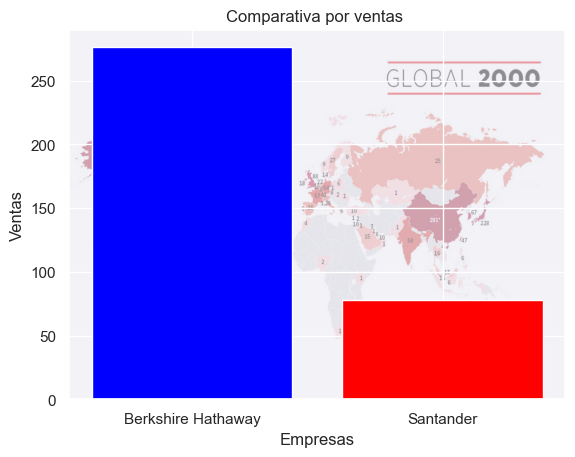

In [52]:
image = mpimg.imread('global_map.jpg')
fig, ax = plt.subplots()

names = ['Berkshire Hathaway', 'Santander']
networths = [276.09, 78.22]

plt.bar(names, networths, color = ['blue', 'red'], align='center')
plt.title('Comparativa por ventas ')

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.xlabel('Empresas')
plt.ylabel('Ventas')
plt.show()

Sin embargo, si comparamos por activos , Santander tiene casi el doble de activos que la primera empresa mundial : 

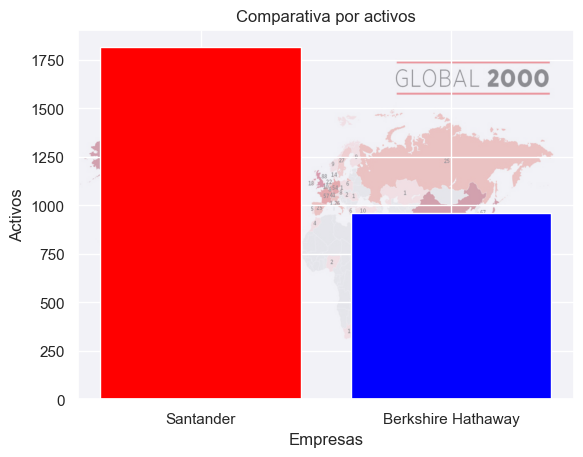

In [51]:
image = mpimg.imread('global_map.jpg')
fig, ax = plt.subplots()

names = [ 'Santander', 'Berkshire Hathaway']
networths = [1814.78,958.78]

plt.bar(names, networths, color = ['red', 'blue'], align='center')
plt.title('Comparativa por activos')

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.xlabel('Empresas')
plt.ylabel('Activos')
plt.show()

6. ANÁLISIS FORBES BILLONARIOS

¿Quiénes ocupan los primeros puestos de esta lista? ¿Quiénes son los hombres más ricos del planeta?

- Top 10 hombres más ricos del mundo :

In [62]:
df_bill.head(10)

name  networth  age        country  \
rank                                                            
1                    Elon Musk      219.0   50  United States   
2                   Jeff Bezos      171.0   58  United States   
3     Bernard Arnault & family      158.0   73         France   
4                   Bill Gates      129.0   66  United States   
5               Warren Buffett      118.0   91  United States   
6                   Larry Page      111.0   49  United States   
7                  Sergey Brin      107.0   48  United States   
8                Larry Ellison      106.0   77  United States   
9                Steve Ballmer       91.4   66  United States   
10               Mukesh Ambani       90.7   64          India   

                  source                industry  
rank                                              
1          Tesla, SpaceX             Automotive   
2                 Amazon             Technology   
3                   LVMH       Fashion & Retail   
4              Microsoft             Technology   
5     Berkshire Hathaway  Finance & Investments   
6                 Google             Technology   
7                 Google             Technology   
8               software             Technology   
9              Microsoft             Technology   
10           diversified            Diversified

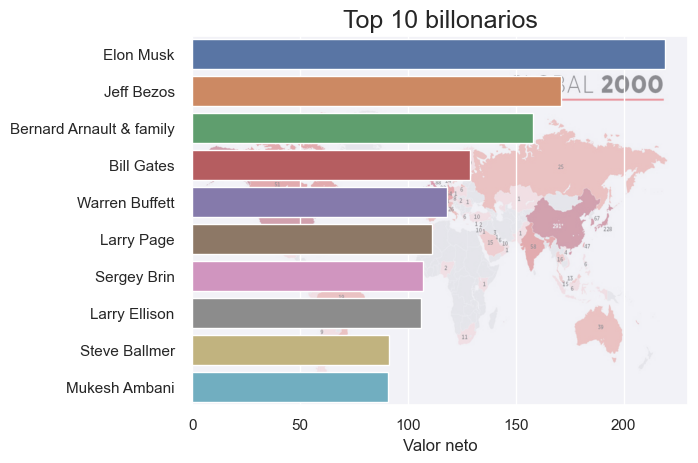

In [164]:
image = mpimg.imread('global_map.jpg')
fig, ax = plt.subplots()

sns.barplot(y=df_bill["name"][:10], x = df_bill["networth"][:10]) # filtramos por las 10 primeras posiciones
plt.title('Top 10 billonarios', fontsize = 15)

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.title("Top 10 billonarios", fontsize=18)
plt.xlabel('Valor neto', fontsize=12)
plt.ylabel("")
plt.show()

¿ Qué países tienen más cantidad de billonarios?

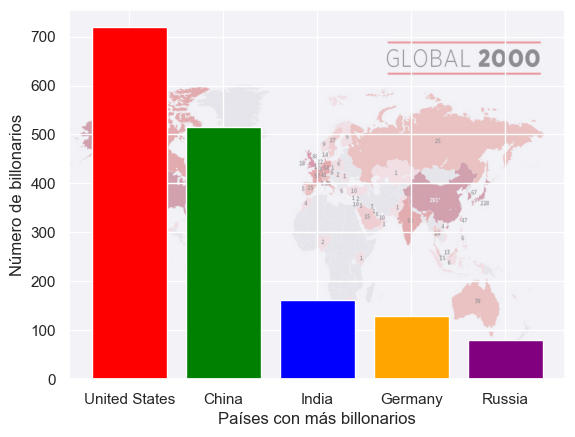

In [183]:
image = mpimg.imread('global_map.jpg')
fig, ax = plt.subplots()

data_grouped = df_bill.groupby('country').size()

# Seleccionar los 5 países con mayor aparición
top_5 = data_grouped.sort_values(ascending=False).head(5)

plt.bar(top_5.index, top_5, color=['red', 'green', 'blue', 'orange', 'purple'])

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

# Agregar etiquetas
plt.xlabel('Países con más billonarios')
plt.ylabel('Número de billonarios')
plt.show();


¿ De dónde obtienen sus ingresos? ¿ A qué industrias pertenecen sus empresas?

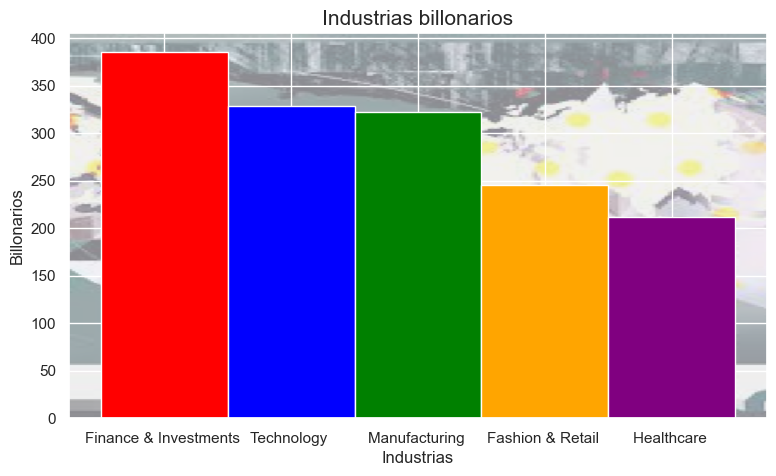

In [37]:
image = mpimg.imread('forbes_map.jpg')
fig, ax = plt.subplots()

feq=df_bill['industry'].value_counts().sort_index().sort_values(ascending=False).head(5)
feq.plot.bar(figsize=(9, 5), color=['red', 'blue', 'green', 'orange', 'purple'], width=1, rot=0)


x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.title("Industrias billonarios", fontsize=15)
plt.ylabel('Billonarios', fontsize=12)
plt.xlabel('Industrias', fontsize=12)
plt.show()

- Top 10 empresas de los billonarios:

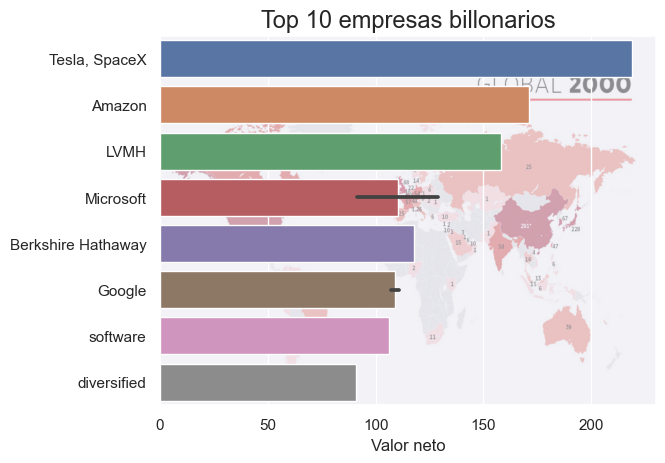

In [40]:
image = mpimg.imread('global_map.jpg')
fig, ax = plt.subplots()

sns.barplot(y=df_bill["source"][:10], x = df_bill["networth"][:10]) 
plt.title('Top 10 billonarios', fontsize = 15)

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.title("Top 10 empresas billonarios", fontsize=17)
plt.xlabel('Valor neto', fontsize=12)
plt.ylabel("")
plt.show()

¿Cuántos españoles hay en la lista ?

In [90]:
df_bill[df_bill['country']=='Spain']

name  networth  age country  \
rank                                                     
23              Amancio Ortega       59.6   86   Spain   
438         Sandra Ortega Mera        5.8   53   Spain   
709            Rafael Del Pino        4.1   63   Spain   
728                  Juan Roig        4.0   72   Spain   
822      Miguel Fluxa Rossello        3.6   83   Spain   
822                Daniel Mate        3.6   58   Spain   
1053               Juan Abello        2.9   80   Spain   
1163          Alicia Koplowitz        2.7   68   Spain   
1196       Isak Andic & family        2.6   68   Spain   
1238            Maria Del Pino        2.5   66   Spain   
1397         Hortensia Herrero        2.2   71   Spain   
1513          Florentino Perez        2.0   75   Spain   
1579      D. Leopoldo Del Pino        1.9   59   Spain   
1729              Sol Daurella        1.7   56   Spain   
1729          Alberto Palatchi        1.7   72   Spain   
1818         Tomas Olivo Lopez        1.6   48   Spain   
1929      Manuel Lao Hernández        1.5   77   Spain   
1929             Fernando Roig        1.5   74   Spain   
2190           Alberto Alcocer        1.3   79   Spain   
2190           Alberto Cortina        1.3   76   Spain   
2190            Carmen Thyssen        1.3   78   Spain   
2324      Jose Maria Aristrain        1.2   59   Spain   
2324           Helena Revoredo        1.2   75   Spain   
2448          Gabriel Escarrer        1.1   87   Spain   
2448  Antonio Gallardo Ballart        1.1   86   Spain   
2578    Jorge Gallardo Ballart        1.0   80   Spain   

                         source                     industry  
rank                                                          
23                         Zara            Fashion & Retail   
438                        Zara            Fashion & Retail   
709                construction  Construction & Engineering   
728                supermarkets            Fashion & Retail   
822                      hotels                     Service   
822         mining, commodities             Metals & Mining   
1053                investments       Finance & Investments   
1163  construction, investments       Finance & Investments   
1196             fashion retail            Fashion & Retail   
1238               construction  Construction & Engineering   
1397               supermarkets            Fashion & Retail   
1513               construction  Construction & Engineering   
1579               construction  Construction & Engineering   
1729          Coca-Cola bottler             Food & Beverage   
1729            wedding dresses            Fashion & Retail   
1818           shopping centers                 Real Estate   
1929                    casinos          Gambling & Casinos   
1929               supermarkets            Fashion & Retail   
2190                investments       Finance & Investments   
2190                investments       Finance & Investments   
2190           investments, art               Manufacturing   
2324                      steel             Metals & Mining   
2324          security services                     Service   
2448                     hotels                     Service   
2448            pharmaceuticals                  Healthcare   
2578            pharmaceuticals                  Healthcare

In [95]:
df_bill[df_bill['country']=='Spain'].count() # hay 26 españoles en la lista

name        26
networth    26
age         26
country     26
source      26
industry    26
dtype: int64

¿ Qué porcentaje de billonarios españoles hay en el mundo?

In [205]:
num_spain_bill = df_bill[df_bill['country']=='Spain'].shape[0]
percent_spain_bill = num_spain_bill / df_bill.shape[0] * 100
print(percent_spain_bill)

1.0


In [206]:
fig = px.pie(values=[percent_spain_bill, 100-percent_spain_bill], 
             names=['Spain', 'Other Countries'], 
             title='Porcentaje de billonarios españoles en el mundo')

fig.show()

El primer español que aparece en la lista es Amancio Ortega, vamos a hacer una comparativa de patrimonio entre él y el primer billonario de la lista mundial 'Elon Musk' : 

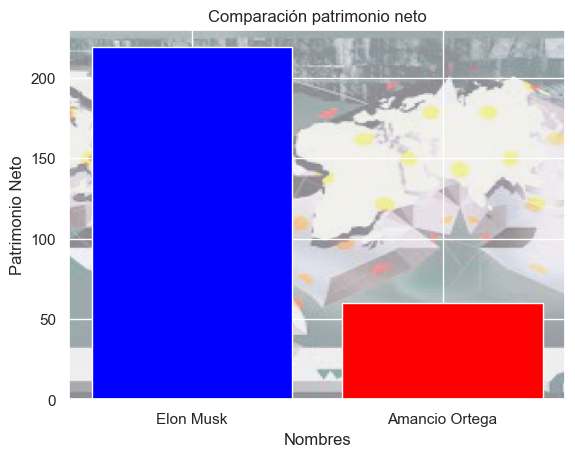

In [55]:
image = mpimg.imread('forbes_map.jpg')
fig, ax = plt.subplots()

names = ['Elon Musk', 'Amancio Ortega']
networths = [219.0, 59.6 ]

plt.bar(names, networths, color = ['blue', 'red'], align='center')
plt.title('Comparación patrimonio neto')

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.xlabel('Nombres')
plt.ylabel('Patrimonio Neto')
plt.show();

¿ Y qué diferencia hay entre el primer español de la lista y el último?

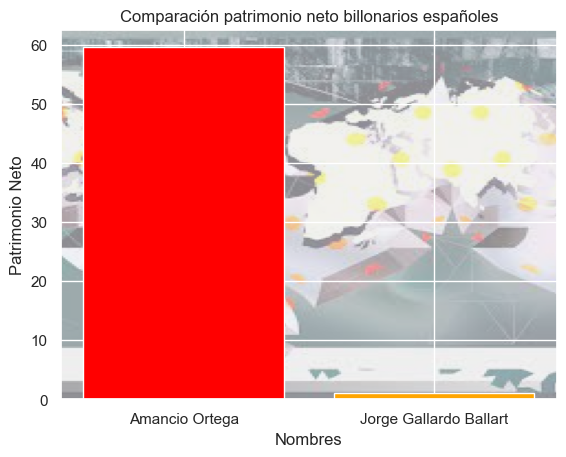

In [57]:
image = mpimg.imread('forbes_map.jpg')
fig, ax = plt.subplots()
names = ['Amancio Ortega', 'Jorge Gallardo Ballart']
networths = [59.6,1.0 ]

plt.bar(names, networths, color = ['red', 'orange'], align='center')
plt.title('Comparación patrimonio neto billonarios españoles')

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.xlabel('Nombres')
plt.ylabel('Patrimonio Neto')
plt.show();

¿Quién es el billonario más joven del mundo?

In [214]:
min_age = df_bill['age'].min()
name = df_bill.loc[df_bill['age'] == min_age, 'name'].iloc[0]
source = df_bill.loc[df_bill['age'] == min_age, 'source'].iloc[0]

print('El billonario más joven es', name, 'con una edad de', min_age, 'y su empresa es', source)

El billonario más joven es Kevin David Lehmann  con una edad de 19 y su empresa es drugstores


¿ Qué edades tienen los billonarios?

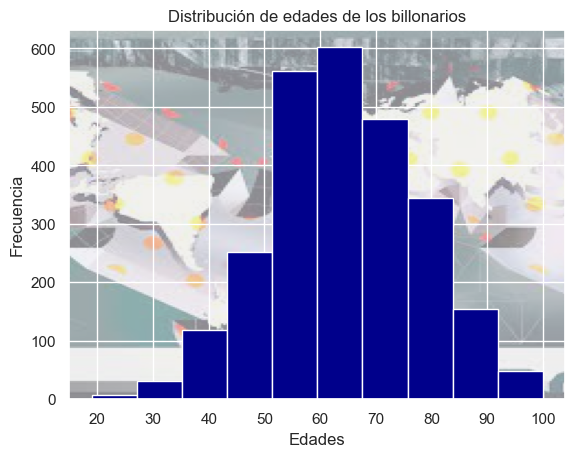

In [47]:
image = mpimg.imread('forbes_map.jpg')
fig, ax = plt.subplots()
ages = df_bill['age'].tolist()
plt.hist(ages, bins = 10, color = 'darkblue')
plt.title('Distribución de edades de los billonarios')

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()

7. CONCLUSIONES

Para concluir, reafirmamos las preguntas de investigación y respondemos explícitamente según nuestros hallazgos:

¿Cuáles son las principales empresas clasificadas por ventas, beneficios, activos y valor de mercado? ¿En qué continentes operan?

Listando solo las 3 primeras:

- Ventas: Wal-Mart Stores (América), Amazon (América), Saudi Aramco (Asia).
- Beneficios: Saudi Aramco (Asia), Apple(América), Berkshire Hathaway (América).
- Valor de mercado: Apple (América), Saudi Aramco (Asia), Microsoft (América).

Los sectores más representados en la clasificación de Forbes de este año fueron Banca, Finanzas diversificadas y tecnología.

Los países que mayor poder económico concentran en el mundo entre empresas y billonarios son Estados Unidos y China, en una clara competición por dominar la economía mundial.


In [18]:
df_2000.to_csv("forbesglobal2000_final.csv")

In [19]:
df_bill.to_csv("forbesbillonarios_final.csv")